<a href="https://colab.research.google.com/github/mikias-wondim/news_correlation_10ac_week0/blob/task-2/w0_d2_news_correlation_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling for different task on Global News ,Dataset from Kaggle:

## Summurize today's task

**MLOps Components and Their Use:**

MLOps, short for Machine Learning Operations, encompasses practices and tools aimed at streamlining the lifecycle of machine learning models, from development to deployment and maintenance. Some key components of MLOps include:
- **Feature Stores:** Store engineered features for training and inference, ensuring consistency and reusability across models.
- **Model Versioning:** Track different versions of models and their artifacts, facilitating reproducibility and collaboration.
- **Model Monitoring:** Continuously monitor model performance and data drift to detect issues and ensure models remain accurate over time.
- **Unit Testing:** Validate model behavior and outputs against expected results to catch errors early in the development process.

**Keyword Extraction/Modeling:**

Keyword extraction involves identifying the most relevant words or phrases in a text document. TF-IDF (Term Frequency-Inverse Document Frequency) is a commonly used technique for this task, where keywords are identified based on their importance in a document relative to a corpus of documents. KeyBert and YAKE are alternative algorithms that leverage deep learning and natural language processing techniques for keyword extraction.

**Topic Modeling:**

Topic modeling is a technique used to discover latent topics or themes within a collection of documents. It involves categorizing documents into a predefined set of topics based on the words and phrases they contain. Common methods for topic modeling include Latent Dirichlet Allocation (LDA) and Non-negative Matrix Factorization (NMF). Analyzing topics and trends involves identifying recurring themes and patterns in the data over time.

**Event Modeling:**
Event modeling aims to identify and categorize the events or occurrences described in news articles. This involves clustering articles based on the events they cover and analyzing the characteristics of these events, such as their frequency, distribution, and correlation with news sites. Versioning ML models and their artifacts using MLFlow helps track changes and updates to models, ensuring reproducibility and accountability.

**Answering the Questions:**

1. **Keyword Extraction:** Compare keywords in the headlines to keywords in the news bodies across sites using TF-IDF or similar techniques.
2. **Topic Modeling:** Categorize titles and content into topic categories and analyze topics and trends over time.
3. **Diverse Topics:** Identify which websites report the most diverse range of topics.
4. **Topic Trends Analysis:** Plot a 2D scatter plot to visualize trends in topics over time.
5. **Event Modeling:** Cluster news articles by events, analyze the number of events covered, determine which sites report events earliest and most frequently, and examine the correlation between news sites reporting events.
6. **Model Versioning:** Use MLFlow to version ML models and their artifacts, ensuring reproducibility and tracking changes over time.

Lets clone our working repository into the colab

In [8]:
# Clone the main branch of our working repo and later create a branch and push it
!git clone https://github.com/mikias-wondim/news_correlation_10ac_week0.git
%cd news_correlation_10ac_week0

Cloning into 'news_correlation_10ac_week0'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 54 (delta 13), reused 25 (delta 1), pack-reused 0
Receiving objects: 100% (54/54), 175.47 KiB | 6.27 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/news_correlation_10ac_week0/news_correlation_10ac_week0


In [2]:
!pwd

/content


Mounting current working colab with our drive

---
Before procedding we need to download the datasets [data.csv.zip](https://drive.google.com/file/d/1ju5i8qZ---K1FYEV5Co0PYvPhW9t8gRb/view?usp=drive_link), [domains_location.csv](https://drive.google.com/file/d/1JCf4CeqNMfSBvMDrghDs744KnMoYWxxz/view?usp=drive_link) and [traffic_data.csv.zip](]) into our drive under a directory `drive/MyDrive/dataset`

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Declaring constant Variables

In [11]:
# CONSTANT VARIABLES
DATASET_DIR = '/dataset/'

# Path to the destination directory of extracted zip files
EXTRACT_FILE_PATH = '/content/extracted_data/'

# Dataset filepath on drive
DATA_ZIP_FILE_PATH = '/content/drive/MyDrive/dataset/data.csv.zip'
DOMAINS_LOCATIONZIP_FILE_PATH = '/content/drive/MyDrive/dataset/domains_location.csv'
RAW_DATA_ZIP_FILE_PATH = '/content/drive/MyDrive/dataset/raw_data.zip'
TRAFFIC_DATA_ZIP_FILE_PATH = '/content/drive/MyDrive/dataset/traffic_data.zip'

## Getting started

Lets get started with importing Libraries and extracting our dataset

In [12]:
# Lets import the necessary libraries for our modeling

# Data manipulation and visulization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess the text data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from string import punctuation
from collections import Counter
import operator
from textblob import TextBlob
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint


# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Import our datasets using function defined in our src/util module
from src.utils import unzip_file

# Unzip the .csv files
data_extracted_files = unzip_file(DATA_ZIP_FILE_PATH, EXTRACT_FILE_PATH)[0]
# raw_data_extracted_files = unzip_file(RAW_DATA_ZIP_FILE_PATH, EXTRACT_FILE_PATH)[0]
traffic_data_extracted_files = unzip_file(TRAFFIC_DATA_ZIP_FILE_PATH, EXTRACT_FILE_PATH)[0]

In [ ]:
# domains_location.csv is not a zip file and need not to get unzipped
# But need to be moved into the extracted_data directory

SOURCE_FILE_PATH = '/content/drive/MyDrive/dataset/domains_location.csv'
DESTINATION_FILE_PATH = '/content/extracted_data/domains_location.csv'
domains_location_file_path = 'domains_location.csv'

# Copy the file from source to destination
import shutil
shutil.copy(SOURCE_FILE_PATH, DESTINATION_FILE_PATH)

Change dataset into pandas DataFrame

In [15]:
# Load the datasets into pandas dataframes
data_df = pd.read_csv(EXTRACT_FILE_PATH + data_extracted_files)
# raw_data_df = pd.read_csv(EXTRACT_FILE_PATH + raw_data_extracted_files)
domains_location_df = pd.read_csv(EXTRACT_FILE_PATH + domains_location_file_path)
traffic_data_df = pd.read_csv(EXTRACT_FILE_PATH + traffic_data_extracted_files)

In [16]:
# Display the first few rows of each dataframe
print("Data dataframe:")
print(data_df.head())
print("\nDomains Location dataframe:")
print(domains_location_df.head())
print("\nTraffic Data dataframe:")
print(traffic_data_df.head())

Data dataframe:
   article_id source_id     source_name  \
0       81664       NaN          Forbes   
1       81667       NaN             CNA   
2       81694      time            Time   
3       81695       NaN        Phys.Org   
4       81703       NaN  Digital Trends   

                                              author  \
0  Elizabeth Brownfield, Contributor, \n Elizabet...   
1                                                NaN   
2                              Christina Larson / AP   
3                                       Sara Schmidt   
4                                       Jason Struss   

                                               title  \
0  superstar chef yannick alléno brings refined f...   
1  nice claim top spot in ligue 1 with late win a...   
2  amphibians are the world’s most vulnerable spe...   
3              image: rusty red waters in madagascar   
4  everything leaving max (formerly hbo max) in n...   

                                         descriptio

## Now lets start working with our modelling

### Keyword Extraction

We'll start with keyword extraction using TF-IDF.

**Keyword Extraction using TF-IDF**

Keyword extraction aims to identify the most important words or phrases in a document. Here, we'll use the TF-IDF (Term Frequency-Inverse Document Frequency) algorithm to extract keywords from both the headline/title and the news body across different sites.

Steps:
1. Preprocess the text data by removing stopwords, punctuation, and converting the text to lowercase. (We'll use helper function on `src/utils.py` module)
2. Tokenize the text into individual words or phrases.
3. Compute the TF-IDF scores for each word or phrase in the document.
4. Identify the top N keywords based on their TF-IDF scores.


Let's start by preprocessing the text data and then compute the TF-IDF scores.

In [41]:
from nltk.stem import PorterStemmer
def preprocess_text(text):
  """
  This function preprocesses text data for further analysis.

  Args:
      text (str): The text to be preprocessed.

  Returns:
      str: The preprocessed text.
  """
  # Lowercase the text
  text = text.lower()

  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  # Remove stopwords
  stop_words = stopwords.words('english')
  text = ' '.join([word for word in text.split() if word not in stop_words])

  return text


In [23]:
# Preprocess title and content columns for keyword extraction
data_df['preprocessed_title'] = data_df['title'].apply(preprocess_text)
data_df['preprocessed_content'] = data_df['content'].apply(preprocess_text)

# Concatenate preprocessed title and content
data_df['preprocessed_text'] = data_df['preprocessed_title'] + ' ' + data_df['preprocessed_content']

In [24]:
data_df['preprocessed_text'].head()

0    superstar chef yannick alléno bring refin fren...
1    nice claim top spot ligu 1 late win clermont n...
2    amphibian world’ vulner speci threat increas w...
3    imag rusti red water madagascar ironrich sedim...
4    everyth leav max formerli hbo max novemb 2023 ...
Name: preprocessed_text, dtype: object

In [25]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the preprocessed text data
vectorizer.fit(data_df['preprocessed_text'])

# Extract the TF-IDF features
tfidf_features = vectorizer.transform(data_df['preprocessed_text'])

# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names_out()

# Get the top N keywords for each document
num_keywords = 10
top_keywords = []
for i, row in enumerate(tfidf_features.toarray()):
    top_keywords.append([feature_names[j] for j in row.argsort()[-num_keywords:]])

# Add the top keywords as a new column to the dataframe
data_df['top_keywords'] = top_keywords

# Print the top keywords for the first few rows
print(data_df['top_keywords'].head())

0    [season, frenchborn, four, park, hotel, lane, ...
1    [provision, 588, lowli, secondhalf, win, hicha...
2    [troubl, seriou, vulner, world, frog, 2579, ne...
3    [astronaut, imag, 756, rusti, betsiboka, ironr...
4    [true, formerli, lineup, streamer, hbo, existe...
Name: top_keywords, dtype: object


In [26]:
# Number of keywords
for keywords in data_df['top_keywords'].head():
  print(len(keywords))

10
10
10
10
10


### Topic modeling with Gensim LSI and LDA

Topic modeling with LSI

In [27]:
# We'll now perform topic modeling using Latent Dirichlet Allocation (LDA) with the Gensim library.

# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary(data_df['preprocessed_text'].apply(lambda x: x.split()))

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text.split()) for text in data_df['preprocessed_text']]

# Build the LDA model
num_topics = 10
lda_model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)

# Print the topics
pprint(lda_model.print_topics())

# Get the topic distribution for each document
topic_distributions = [lda_model[doc] for doc in corpus]

# Add the topic distributions as a new column to the dataframe
data_df['topic_distributions'] = topic_distributions

# Print the topic distributions for the first few rows
print(data_df['topic_distributions'].head())


(0, '0.434*"char" + 0.391*"report" + 0.291*"–" + 0.290*"inc" + 0.281*"free"')
(1, '-0.458*"char" + -0.358*"2023" + -0.291*"market" + 0.243*"inc" + -0.171*"nov"')
(2, '-0.322*"trade" + 0.305*"inc" + -0.265*"get" + -0.255*"report" + 0.203*"2023"')
(3, '-0.454*"report" + 0.374*"char" + -0.349*"market" + 0.220*"trade" + 0.204*"new"')
(4, '0.511*"trade" + 0.271*"share" + 0.269*"market" + 0.263*"stock" + -0.260*"report"')


Now, let's proceed with TF-IDF vectorization using the cleaned combined text:

In [ ]:
# Initialize the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(stop_words="english", max_features=1000, max_df=0.5, smooth_idf=True)

# Vectorize the preprocessed text
tfidf_matrix = tfidf.fit_transform(data_df['preprocessed_text'])

# Convert the tfidf matrix into an array
X = tfidf_matrix.toarray()

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", X.shape)

In [29]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [30]:
stop =  set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents from the complaints column
list_of_docs = data_df['preprocessed_text'].tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:2])

[['superstar', 'chef', 'yannick', 'alléno', 'bring', 'refin', 'french', 'cuisin', 'pavyllon', 'london', 'pavyllon', 'london', 'four', 'season', 'hotel', 'london', 'park', 'lane', 'courtesi', 'four', 'season', 'hotel', 'london', 'park', 'lane', 'pavyllon', 'london', 'latest', 'restaur', 'prolif', 'frenchborn', 'yannick', 'alléno', '…', '5266', 'char'], ['nice', 'claim', 'top', 'spot', 'ligu', '1', 'late', 'win', 'clermont', 'nice', 'move', 'provision', 'first', 'place', 'ligu', '1', 'stand', 'thank', 'secondhalf', 'hicham', 'boudaoui', 'goal', 'secur', '10', 'win', 'lowli', 'clermont', 'foot', 'friday', 'result', 'lift', 'nice', 'first…', '588', 'char']]


In [31]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.434*"char" + 0.391*"report" + 0.291*"–" + 0.290*"inc" + 0.281*"free" + '
  '0.272*"share" + 0.173*"quarter" + 0.149*"accord" + 0.142*"compani" + '
  '0.140*"recent"'),
 (1,
  '-0.458*"char" + -0.358*"2023" + -0.291*"market" + 0.243*"inc" + '
  '-0.171*"nov" + -0.160*"globe" + -0.158*"newswir" + 0.141*"quarter" + '
  '-0.141*"global" + 0.139*"free"'),
 (2,
  '-0.322*"trade" + 0.305*"inc" + -0.265*"get" + -0.255*"report" + '
  '0.202*"2023" + 0.201*"accord" + 0.192*"quarter" + 0.185*"recent" + '
  '-0.177*"stock" + 0.173*"market"'),
 (3,
  '-0.453*"report" + 0.374*"char" + -0.350*"market" + 0.218*"trade" + '
  '0.204*"new" + -0.167*"research" + -0.152*"global" + -0.140*"2023" + '
  '-0.134*"rate" + -0.130*"billion"'),
 (4,
  '0.512*"trade" + 0.271*"share" + 0.268*"market" + 0.263*"stock" + '
  '-0.261*"report" + 0.234*"inc" + -0.234*"char" + 0.142*"new" + 0.121*"last" '
  '+ 0.120*"high"')]


Topic Modeling with LDA

In [33]:
import string
from gensim.models.ldamodel import LdaModel

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=5,id2word=dictionary, random_state=20, passes=30)

# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.021*"char" + 0.010*"best" + 0.009*"deal" + 0.008*"imag" + 0.008*"black" + '
  '0.007*"friday" + 0.006*"new" + 0.006*"one" + 0.005*"getti" + 0.005*"year"'),
 (1,
  '0.031*"char" + 0.007*"u" + 0.007*"said" + 0.006*"state" + 0.006*"novemb" + '
  '0.006*"gaza" + 0.005*"2023" + 0.005*"presid" + 0.005*"israel" + '
  '0.005*"minist"'),
 (2,
  '0.039*"report" + 0.029*"char" + 0.027*"–" + 0.026*"free" + 0.024*"share" + '
  '0.023*"get" + 0.022*"trade" + 0.021*"stock" + 0.014*"rate" + 0.013*"price"'),
 (3,
  '0.038*"inc" + 0.030*"report" + 0.027*"char" + 0.027*"share" + 0.027*"–" + '
  '0.026*"free" + 0.025*"quarter" + 0.021*"accord" + 0.020*"recent" + '
  '0.019*"hold"'),
 (4,
  '0.030*"char" + 0.019*"2023" + 0.016*"market" + 0.011*"nov" + 0.010*"globe" '
  '+ 0.010*"newswir" + 0.010*"global" + 0.007*"new" + 0.007*"billion" + '
  '0.006*"india"')]


In [34]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.385790501825012

Coherence Score:  0.5864636772451173


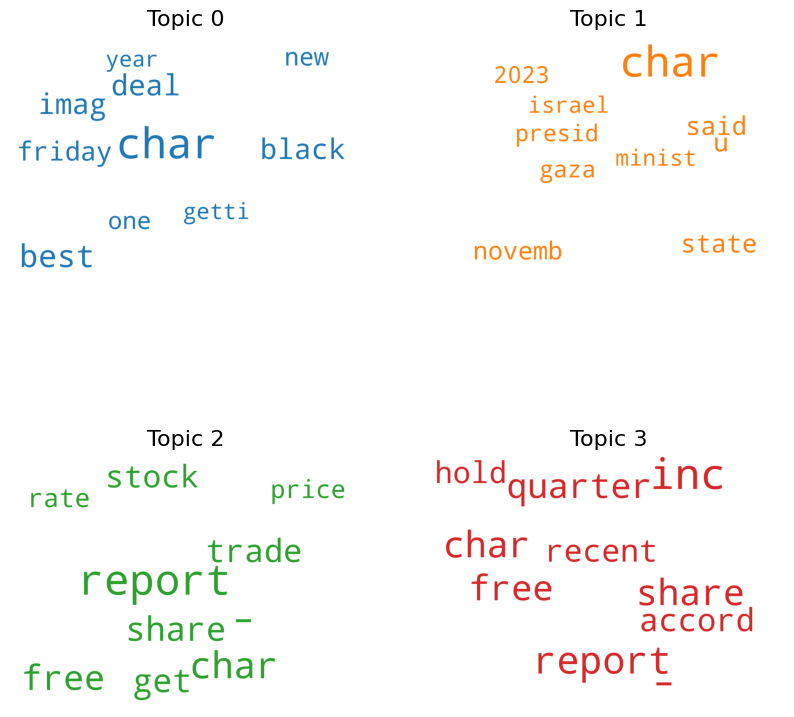

In [36]:
# Word Cloud Visualization
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


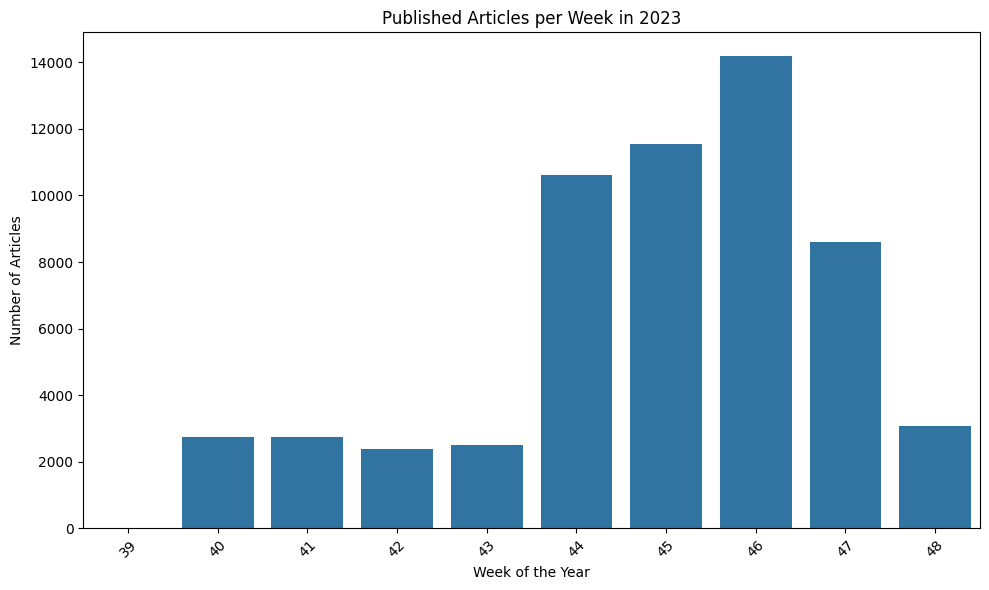

In [38]:
import re
def extract_week_and_year(value):
    """
    Extracts the week and year from a value (string or datetime).

    Args:
        value: The value to extract the week and year from (string or datetime).

    Returns:
        A tuple containing the week and year as integers (week, year),
        or None if they cannot be extracted.
    """
    if isinstance(value, str):
        try:
            # Attempt parsing with regular expressions for common formats
            match = re.search(r"(\d{4})-(\d{2})-(\d{2})", value)  # YYYY-MM-DD
            if match:
                year = int(match.group(1))
                month = int(match.group(2))
                day = int(match.group(3))
                return pd.Timestamp(year, month, day).week, year
            match = re.search(r"(\d{4})/(\d{2})/(\d{2})", value)  # YYYY/MM/DD
            if match:
                year = int(match.group(1))
                month = int(match.group(2))
                day = int(match.group(3))
                return pd.Timestamp(year, month, day).week, year
            # Add other format checks as needed
        except (ValueError, AttributeError):
            return None
    elif isinstance(value, pd.Timestamp):
        # Extract week and year from datetime object
        return value.week, value.year
    else:
        # Handle other data types (optional)
        return None

# Assuming 'data_df' contains the necessary data
# Extract week and year from the 'published_date' column
data_df["week_year"] = data_df["published_at"].apply(extract_week_and_year)

# Filter data for 2023
data_df = data_df[data_df["week_year"].apply(lambda x: x[1]) == 2023]

# Group by week and count articles
weekly_counts = data_df["week_year"].apply(lambda x: x[0]).value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_counts.index, y=weekly_counts.values)
plt.xlabel("Week of the Year")
plt.ylabel("Number of Articles")
plt.title("Published Articles per Week in 2023")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
!pip install sentence_transformers

In [56]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Load a pretrained Sentence Transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode the preprocessed text data to obtain sentence embeddings
sentence_embeddings = model.encode(preprocessed_text)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(sentence_embeddings)

# Add cluster labels to the DataFrame
data_df['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
data_df['cluster'].head()

0    2
1    5
2    9
3    9
4    2
Name: cluster, dtype: int32

In [ ]:
# Visualize clusters using t-SNE
from sklearn.manifold import TSNE

# Reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(sentence_embeddings)


In [ ]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Cluster Visualization using t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

In [ ]:
# Visualize top keywords for each cluster
top_keywords = []
for cluster in range(10):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_text = data_df['preprocessed_text'][cluster_indices]
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = vectorizer.fit_transform(cluster_text)
    feature_names = vectorizer.get_feature_names_out()
    top_keywords.append([feature_names[i] for i in tfidf_matrix.max(axis=0).toarray().argsort()[-10:]])

# Create a bar plot for top keywords
plt.figure(figsize=(10, 6))
for i, keywords in enumerate(top_keywords):
    plt.bar(keywords, range(len(keywords)), label=f'Cluster {i}')
plt.xlabel('Keywords')
plt.ylabel('Cluster')
plt.title('Top Keywords for Each Cluster')
plt.legend()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=45)
plt.tight_layout()
plt.show()